# Business Case study : Walmart
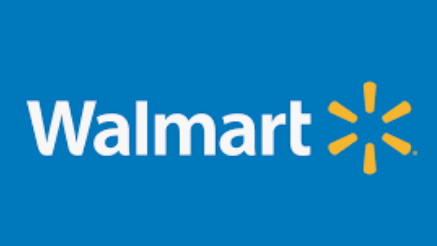

# Importing all the libraries for analyzing the case study

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom
import scipy.stats as stats
import math

# Defining Problem Statement and Analyzing basic metrics

# Problem Statement
The Management team in the company Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) 
against the customer’s gender and the various other factors to help the business make better decisions. 
They want to understand if the spending habits differ between male and female customers: 
Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [15]:
df = pd.read_csv('walmart.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [16]:
df.shape

(550068, 10)

Above dataset contains 550068 rows and 10 columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [18]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# Insight as follows : The above dataset contain zero Null values. No Missing values.

Converting numerical datatype to categorical datatype
Changing the datatype of Occupation, Marital_Status & Product_Category 

In [19]:
# Changing datatype int64 to object
columns = ['Occupation','Marital_Status','Product_Category']
df[columns] = df[columns].astype('object')
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [20]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,NaN,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,NaN,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,1.003029e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,1.727592e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,1.001516e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


# Observation from above table:
1) The top people purchasing are in the age range of 26–35.
2) Males are top in purchasing
3) The average purchase is 9263.96 and the maximum purchase is 23961, so the average value is sensitive to outliers,
   but the fact that the mean is so small compared to the maximum value indicates the maximum value is an outlier.

# Non-Graphical Analysis: Value counts and unique attributes

Value Counts:

In [21]:
gender_counts = df['Gender'].value_counts()
percentage_gender_counts = (gender_counts / len(df)) * 100
print(f"Gender count : \n{gender_counts} \nGender percentage : \n{percentage_gender_counts}")

Gender count : 
M    414259
F    135809
Name: Gender, dtype: int64 
Gender percentage : 
M    75.310507
F    24.689493
Name: Gender, dtype: float64


In [22]:
Age_counts = df['Age'].value_counts()
percentage_Age_counts = (Age_counts / len(df)) * 100
print(f"Age count : \n{Age_counts} \nAge percentage : \n{percentage_Age_counts}")

Age count : 
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64 
Age percentage : 
26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64


In [25]:
Stay_In_Current_City_Years_counts = df['Stay_In_Current_City_Years'].value_counts()
percentage_Stay_In_Current_City_Years_counts = (Stay_In_Current_City_Years_counts / len(df)) * 100
print(f"Stay_In_Current_City_Years count : \n{Stay_In_Current_City_Years_counts}\nStay_In_Current_City_Years percentage : \n{percentage_Stay_In_Current_City_Years_counts}")

Stay_In_Current_City_Years count : 
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
Stay_In_Current_City_Years percentage : 
1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64


In [27]:
Marital_Status_counts = df['Marital_Status'].value_counts()
percentage_Marital_Status_counts = (Marital_Status_counts / len(df)) * 100
print(f"Marital_Status count : \n{Marital_Status_counts} \nMarital_Status percentage : \n{percentage_Marital_Status_counts}")

Marital_Status count : 
0    324731
1    225337
Name: Marital_Status, dtype: int64 
Marital_Status percentage : 
0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64


# Insights :
1) 75% of users are male and 25% are female.
2) Users ages 26–35 are 40%, users ages 36–45 are 20%, users ages 18–25 are 18%, 
   and very low users ages ( 0–17 & 55+ )are 5%.
3) 35% stay in a city for 1 year, 18% stay in a city for 2 years, 17% stay in a city for 3 years, 
   and 15% stay in a city for 4+ years.
4) 60% of users are single, and 40% are married.

Unique attributes :

In [28]:
unique_category_count = df['Product_Category'].nunique()
print('Unique Product_Category count:',unique_category_count)

Unique Product_Category count: 20


In [29]:
unique_City_Category_count = df['City_Category'].nunique()
print('Unique City_Category count:',unique_City_Category_count)

Unique City_Category count: 3


In [30]:
unique_Product_ID_count = df['Product_ID'].nunique()
print('Unique Product_ID count:',unique_Product_ID_count)

Unique Product_ID count: 3631


In [31]:
unique_User_ID_count = df['User_ID'].nunique()
print('Unique User_ID count:',unique_User_ID_count)

Unique User_ID count: 5891


# Insights :
1) The total product category count is 20 unique products.
2) The total number of unique city categories is three.
3) The total number of unique product IDs is 3631.
4) The total number of unique user IDs is 5891

# Visual Analysis - Univariate & Bivariate

# Univariate

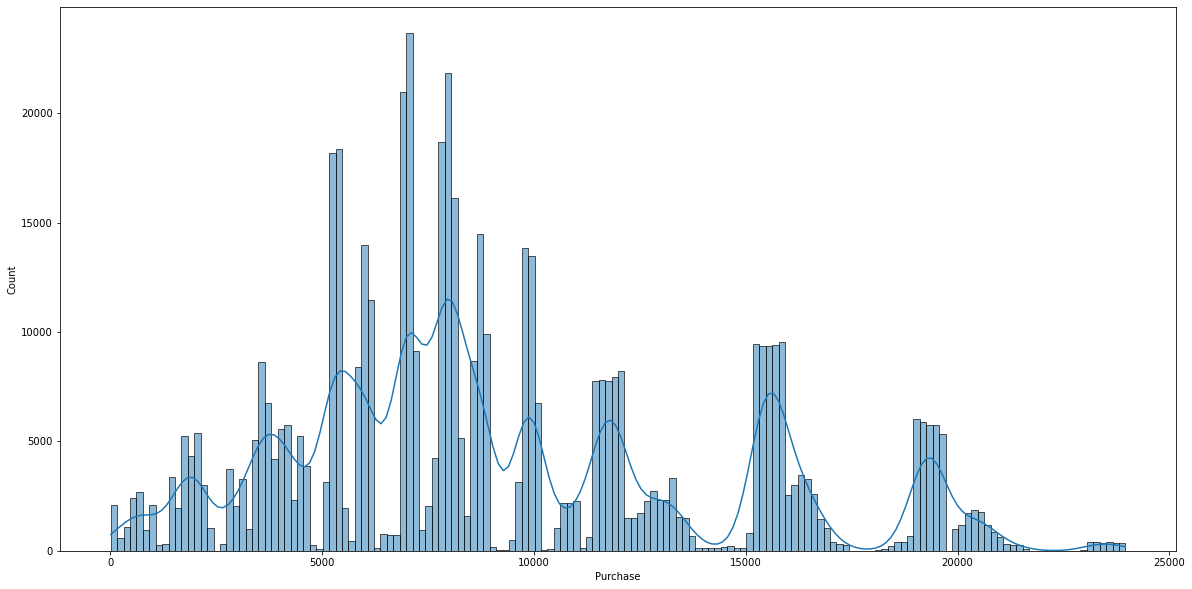

In [32]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

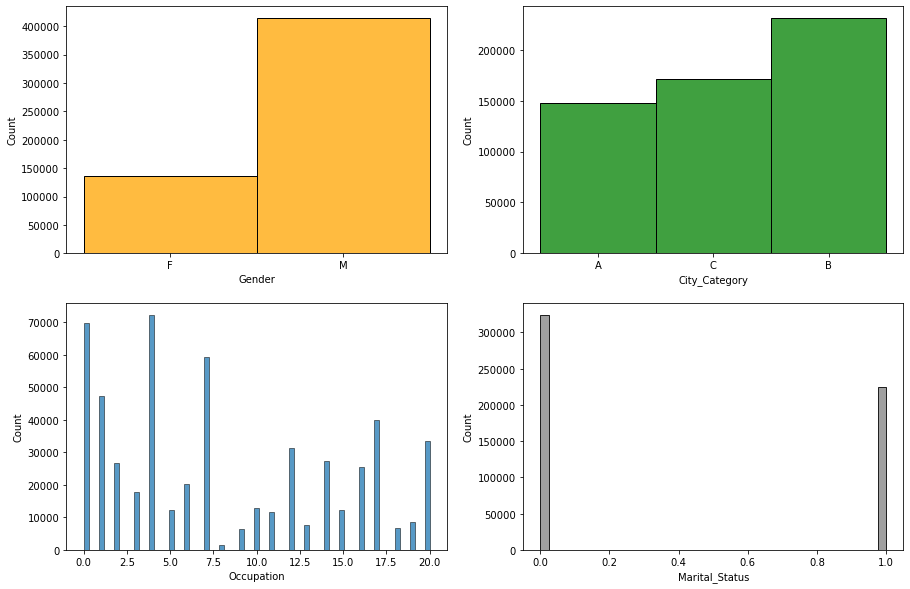

In [33]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.histplot(data=df, x='Gender', ax=axis[0,0],color = "orange")
sns.histplot(data=df, x='City_Category', ax=axis[0,1],color = "green")
sns.histplot(data=df, x='Occupation', ax=axis[1,0])
sns.histplot(data=df, x='Marital_Status',ax=axis[1,1],color = "grey")
plt.show()

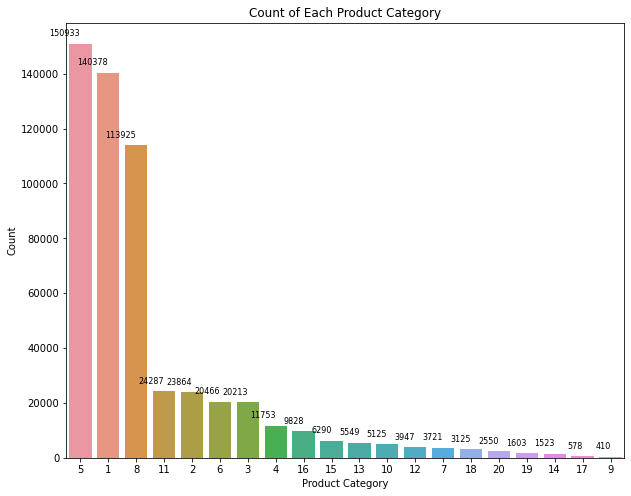

In [34]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category', order=df['Product_Category'].value_counts().index)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Count of Each Product Category')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='right', va='center', fontsize=8, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

# Insights:
1) The product categories 5, 1, and 8 have the highest purchase.
2) Male purchasing power outnumbers female purchasing power.
3) More users below in the B city region
4) Max users are single.
5) The maximum purchase ranges from 5000 to 15000.

# Outliers detection using BoxPlots:

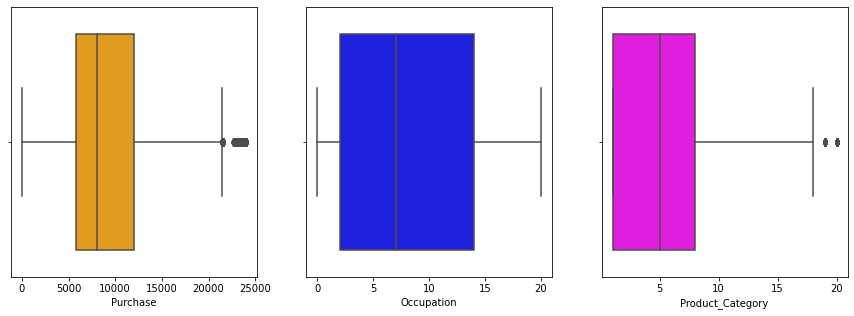

In [35]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15,2))
fig.subplots_adjust(top=2)
sns.boxplot(data=df, x='Purchase', ax=axis[0],color = "orange")
sns.boxplot(data=df, x='Occupation', ax=axis[1],color = "blue")
sns.boxplot(data=df, x='Product_Category', ax=axis[2],color = "magenta")
plt.show()

# Insights:
1) Purchases have outliers.
2) The occupation does not have any outliers.
3) Product categories have some outliers, but most of the products are purchased in the range 1 to 8.

# Using pie chart:

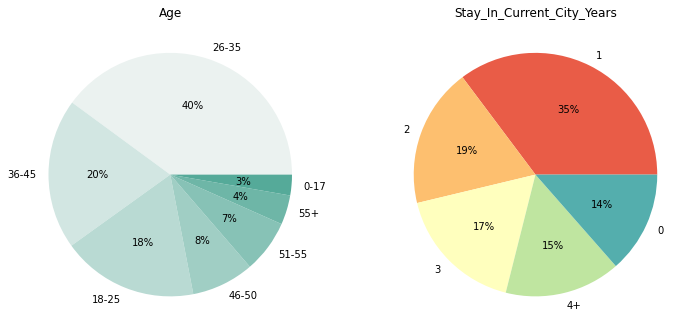

In [36]:
unique_colors_age = sns.color_palette("light:#5A9", len(df['Age'].unique()))
unique_colors_city_years = sns.color_palette("Spectral", len(df['Stay_In_Current_City_Years'].unique()))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data_age = df['Age'].value_counts(normalize=True) * 100
axs[0].pie(x=data_age.values, labels=data_age.index, autopct='%.0f%%', colors=unique_colors_age)
axs[0].set_title("Age")

data_city_years = df['Stay_In_Current_City_Years'].value_counts(normalize=True) * 100
axs[1].pie(x=data_city_years.values, labels=data_city_years.index, autopct='%.0f%%', colors=unique_colors_city_years)
axs[1].set_title("Stay_In_Current_City_Years")
plt.show()

# Insights :
1) Users ages 26–35 are 40%, users ages 36–45 are 20%, users ages 18–25 are 18%, users ages 46–50 are 8%, 
   users ages 51–55 are 7%, users ages 55+ are 4%, and very low users ages 0–17 are 2%.
2) 35% stay in a city for 1 year, 19% stay in a city for 2 years, 17% stay in a city for 3 years, 
   and 15% stay in a city for 4+ years.

# Bivariate Analysis:

Analyzing the variation in purchases with the following,

1. Gender vs Purchase
2. Martial_Status vs Purchase
3. Age vs Purchase
4. City_Category vs Purchase

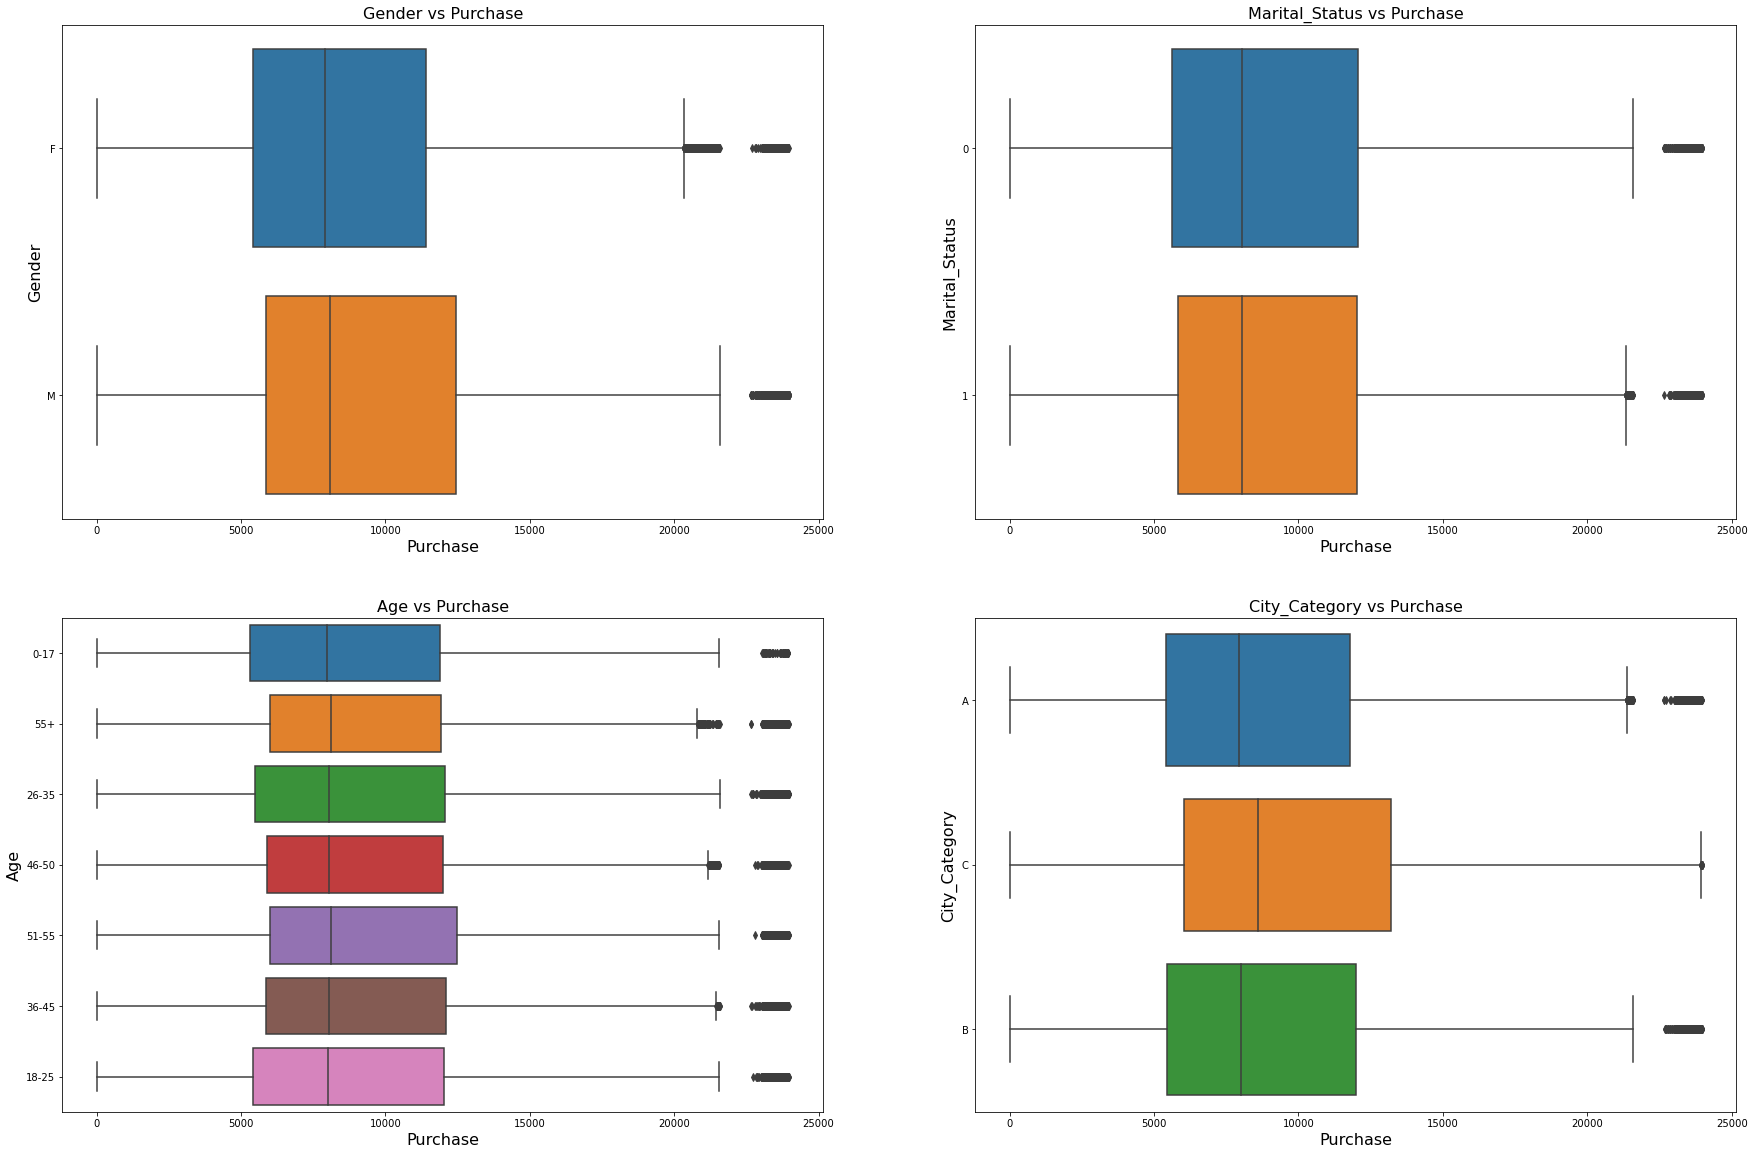

In [37]:
fig1, axs=plt.subplots(nrows=2,ncols=2, figsize=(30,20))

sns.boxplot(data=df, y='Gender',x ='Purchase',orient='h',ax=axs[0,0])
axs[0,0].set_title("Gender vs Purchase", fontsize=16)
axs[0,0].set_xlabel("Purchase", fontsize=16)  
axs[0,0].set_ylabel("Gender", fontsize=16)

sns.boxplot(data=df, y='Marital_Status',x ='Purchase',orient='h',ax=axs[0,1])
axs[0,1].set_title("Marital_Status vs Purchase", fontsize=16)
axs[0,1].set_xlabel("Purchase", fontsize=16)  
axs[0,1].set_ylabel("Marital_Status", fontsize=16)

sns.boxplot(data=df, y='Age',x ='Purchase',orient='h',ax=axs[1,0])
axs[1,0].set_title("Age vs Purchase", fontsize=16)
axs[1,0].set_xlabel("Purchase", fontsize=16)  
axs[1,0].set_ylabel("Age", fontsize=16) 

sns.boxplot(data=df, y='City_Category',x ='Purchase',orient='h',ax=axs[1,1])
axs[1,1].set_title("City_Category vs Purchase", fontsize=16)
axs[1,1].set_xlabel("Purchase", fontsize=16)  
axs[1,1].set_ylabel("City_Category", fontsize=16) 
plt.show()

# insight
1) Gender vs. Purchase
   a) The median for males and females is almost equal.
   b) Females have more outliers compared to males.
   c) Males purchased more compared to females.
2) Martial Status vs. Purchase
   a) The median for married and single people is almost equal.
   b) Outliers are present in both records.
3) Age vs. Purchase
   a) The median for all age groups is almost equal.
   b) Outliers are present in all age groups.
4) City Category vs. Purchase
   a) The C city region has very low outliers compared to other cities.
   b) A and B city region medians are almost the same.

# Using pandas quantile funtion detecting number of outliers from purchase

In [38]:
q1 = df["Purchase"].quantile(0.25)
q3 = df["Purchase"].quantile(0.75)
IQR = q3-q1
outliers = df["Purchase"][((df["Purchase"]<(q1-1.5*IQR)) | (df["Purchase"]>(q3+1.5*IQR)))]
print("number of outliers: "+ str(len(outliers)))
print("max outlier value:"+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

number of outliers: 2677
max outlier value:23961
min outlier value: 21401


# Are women spending more money per transaction than men? Why or Why not?

In [39]:
avg_by_gender = df.groupby('Gender')['Purchase'].mean()
print(f'Average purchase of male and female : \n{avg_by_gender}')

Average purchase of male and female : 
Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


In [40]:
agg_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].agg({'Purchase': ['sum', 'mean']})
agg_df = agg_df.reset_index()
agg_df = agg_df.sort_values(by='User_ID', ascending=False)

print(f"Top 10 purchase from male and female\n{agg_df.head(10)}")

Top 10 purchase from male and female
      User_ID Gender Purchase              
                          sum          mean
5890  1006040      M  1653299   9184.994444
5889  1006039      F   590319   7977.283784
5888  1006038      F    90034   7502.833333
5887  1006037      F  1119538   9176.540984
5886  1006036      F  4116058   8007.894942
5885  1006035      F   956645   6293.717105
5884  1006034      M   197086  16423.833333
5883  1006033      M   501843  13940.083333
5882  1006032      M   517261   9404.745455
5881  1006031      F   286374   9237.870968


In [41]:
Gender_wise_count=agg_df['Gender'].value_counts()
print(f'Each gender wise count : \n{Gender_wise_count}')

Each gender wise count : 
M    4225
F    1666
Name: Gender, dtype: int64


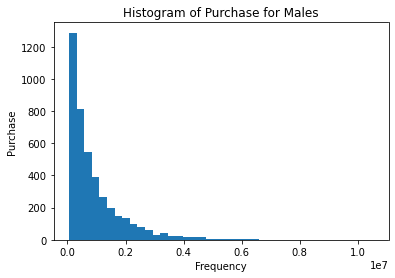

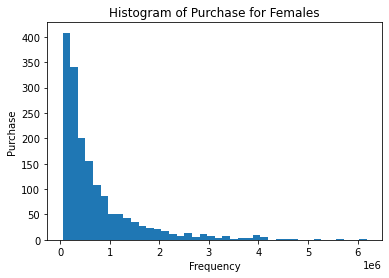

In [42]:
sum_by_gender = df.groupby(['User_ID', 'Gender'])['Purchase'].sum()
sum_by_gender = sum_by_gender.reset_index()
sum_by_gender = sum_by_gender.sort_values(by='User_ID', ascending=False)

# MALE data representation through a histogram
male_data = sum_by_gender[sum_by_gender['Gender']=='M']['Purchase']
plt.hist(male_data, bins=40)
plt.ylabel('Purchase')
plt.xlabel('Frequency')
plt.title('Histogram of Purchase for Males')
plt.show()

# FEMALE data representation through a histogram
Female_data = sum_by_gender[sum_by_gender['Gender']=='F']['Purchase']
plt.hist(Female_data, bins=40)
plt.ylabel('Purchase')
plt.xlabel('Frequency')
plt.title('Histogram of Purchase for Females')
plt.show()

In [43]:
Mean_by_gender = df.groupby(['User_ID', 'Gender'])['Purchase'].sum()
Mean_by_gender = Mean_by_gender.reset_index()
Mean_by_gender = Mean_by_gender.sort_values(by='User_ID', ascending=False)
Male_cust_avg = Mean_by_gender[Mean_by_gender['Gender']=='M']['Purchase'].mean()
Female_cust_avg = Mean_by_gender[Mean_by_gender['Gender']=='F']['Purchase'].mean()
print(f'Male customer average spent amount: {Male_cust_avg}')
print(f'Female customer average spent amount: {Female_cust_avg}')

Male customer average spent amount: 925344.4023668639
Female customer average spent amount: 712024.3949579832


# insight
1) Male customers spend more money than female customers.
2) The highest purchase has been made from this user id: `1006040`, and the gender is male.
3) Most of the females also purchase, but they don't spend a lot more.

# Confidence intervals and distribution of the mean of the expenses by female and male customers.

Population mean: random male samples mean purchase value: 927051.4303333333
Population mean: random Female samples mean purchase value : 712398.956
Sample means of Male purchase : 925344.4
Sample STD of Male purchase : 985830.1
Sample means of Female purchase : 712024.39
Sample STD of Female purchase : 807370.73


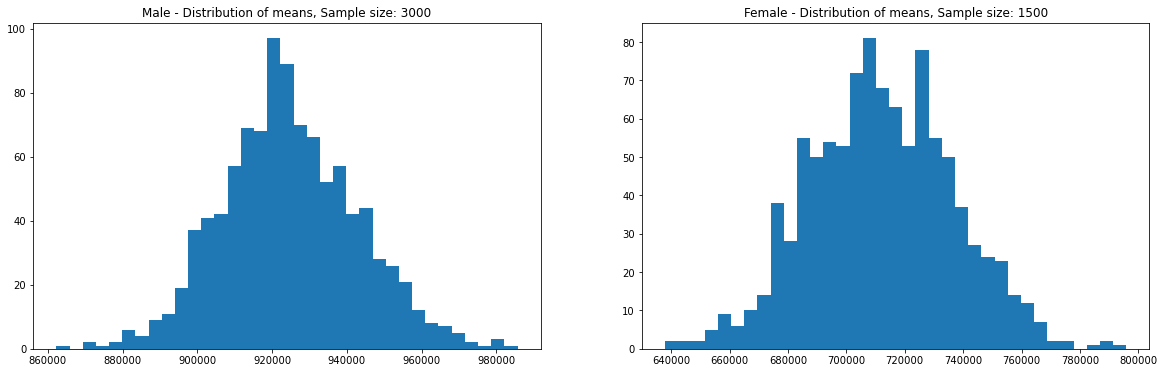

In [44]:
# filtering gender wise dataframe
male_df = sum_by_gender[sum_by_gender['Gender']=='M']
female_df = sum_by_gender[sum_by_gender['Gender']=='F']

# Taking random sample size from dataframe
male_sample_size = 3000
female_sample_size = 1000
num_repitions = 1000

# Taking random sample from male and female dataframe
random_sample_male = male_df.sample(n=male_sample_size)
random_sample_female = female_df.sample(n=female_sample_size)

# Taking mean value from random sample male and female dataframe
male_means = random_sample_male['Purchase'].mean()
print(f'Population mean: random male samples mean purchase value: {male_means}')
female_means = random_sample_female['Purchase'].mean()
print(f'Population mean: random Female samples mean purchase value : {female_means}')

# Taking sample mean from filtered male dataframe
Male_sample_mean = round(male_df['Purchase'].mean(),2)
print(f'Sample means of Male purchase : {Male_sample_mean}')
Male_std_value = round(male_df['Purchase'].std(),2)
print(f'Sample STD of Male purchase : {Male_std_value}')

# Taking sample mean from filtered female dataframe
Female_sample_mean = round(female_df['Purchase'].mean(),2)
print(f'Sample means of Female purchase : {Female_sample_mean}')
Female_std_value = round(female_df['Purchase'].std(),2)
print(f'Sample STD of Female purchase : {Female_std_value}')

# taking blank list to creat histogram
male_means1 = []
female_means1 = []

# using for loop to create again mean value for histogram
for _ in range(num_repitions):
    male_mean2 = male_df.sample(male_sample_size,replace=True)['Purchase'].mean()
    female_mean2 = female_df.sample(female_sample_size,replace=True)['Purchase'].mean()
    male_means1.append(male_mean2)
    female_means1.append(female_mean2)
    
# making histogram to check visually distribution mean for male and female
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(male_means1, bins=35)
axis[1].hist(female_means1, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")
plt.show()

# Insight 
1) The average amount spent by male customers is 925344.4.
2) The average amount spent by female customers is 712024.39.
3) Male customers have made more purchases than female customers.

# Are confidence intervals of average male and female spending overlapping? How can company leverage this conclusion to make changes or improvements?

In [45]:
#sample size
sample_size = 3000
# Confidence level ( 95% confidence interval)
confidence_level = 0.95
# Calculate the margin of error using the z-distribution for male
z_critical = stats.norm.ppf((1 + confidence_level) / 2)  
margin_of_error = z_critical * (Male_std_value / np.sqrt(sample_size))
# Calculate the margin of error using the z-distribution for female
z_critical = stats.norm.ppf((1 + confidence_level) / 2)  
margin_of_error = z_critical * (Female_std_value / np.sqrt(sample_size))

Confidence Interval 95% Male: (896453.5403615071, 954235.259638493)


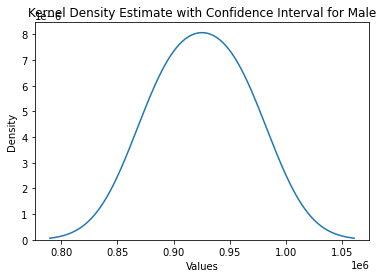

In [46]:
# Calculate the confidence interval for male and presenting it on the graph
Male_confidence_interval = (Male_sample_mean - margin_of_error, Male_sample_mean + margin_of_error)
print("Confidence Interval 95% Male:", Male_confidence_interval)
sns.kdeplot(Male_confidence_interval)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate with Confidence Interval for Male')
plt.show()

Confidence Interval 95% Female: (683133.5303615071, 740915.2496384929)


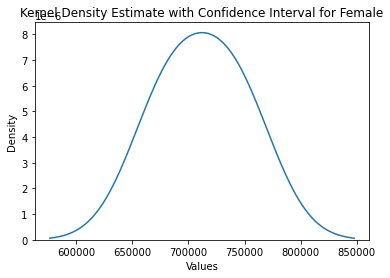

In [47]:
# Calculate the confidence interval for female and presenting it on the graph
Female_confidence_interval = (Female_sample_mean - margin_of_error, Female_sample_mean + margin_of_error)
print("Confidence Interval 95% Female:", Female_confidence_interval)
sns.kdeplot(Female_confidence_interval)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate with Confidence Interval for Female')
plt.show()

# Insight 
1) With reference to the above data, at a 95% confidence interval:
   a) The average amount spent by male customers will lie between 896453.54 and 954235.25.
   b) The average amount spent by female customers will lie between 683133.53 and 740915.24.
2) Confidence intervals for average male and female spending are not overlapping.
3) With respect to the above data, company should target more male customers, as they spend a lot compared to females.

# Results when the same activity is performed for Married vs Unmarried 

In [48]:
sum_by_Marital_Status = df.groupby(['User_ID', 'Marital_Status'])['Purchase'].sum()
sum_by_Marital_Status = sum_by_Marital_Status.reset_index()
sum_by_Marital_Status = sum_by_Marital_Status.sort_values(by='User_ID', ascending=False)
Married_cust_avg = sum_by_Marital_Status[sum_by_Marital_Status['Marital_Status']==1]['Purchase'].mean()
print(f'Married customer average spent amount: {Married_cust_avg}')

Married customer average spent amount: 843526.7966855295


In [49]:
sum_by_Marital_Status = df.groupby(['User_ID', 'Marital_Status'])['Purchase'].sum()
sum_by_Marital_Status = sum_by_Marital_Status.reset_index()
sum_by_Marital_Status = sum_by_Marital_Status.sort_values(by='User_ID', ascending=False)
Unmarried_cust_avg = sum_by_Marital_Status[sum_by_Marital_Status['Marital_Status']==0]['Purchase'].mean()
print(f'Unmarried customer average spent amount: {Unmarried_cust_avg}')

Unmarried customer average spent amount: 880575.7819724905


Population mean: random Unmarried samples mean purchase value: 870136.4133333333
Population mean: random Married samples mean purchase value : 842309.222
Sample means of Unmarried purchase : 880575.78
Sample STD of Unmarried purchase : 949436.25
Sample means of Married purchase : 843526.8
Sample STD of Married purchase : 935352.12


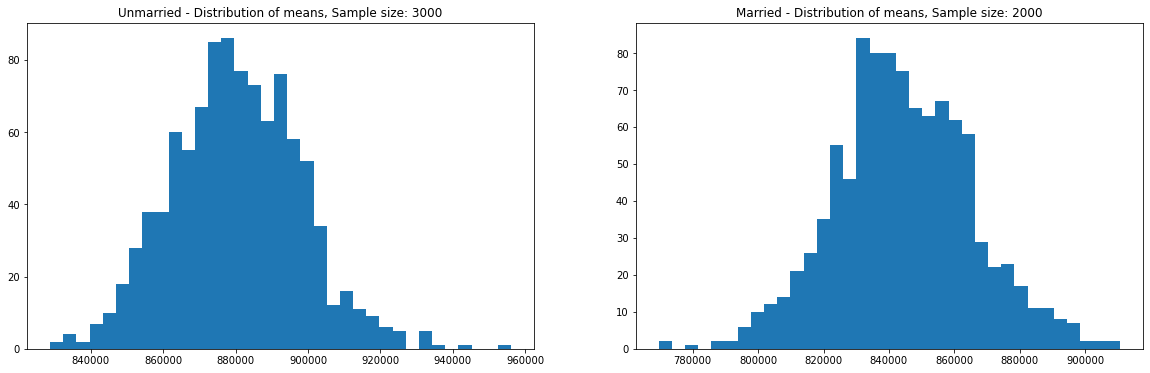

In [50]:
# filtering Marital Status wise dataframe
Unmarried_df = sum_by_Marital_Status[sum_by_Marital_Status['Marital_Status']==0]
Married_df = sum_by_Marital_Status[sum_by_Marital_Status['Marital_Status']==1]

# Taking random sample size from dataframe
Unmarried_sample_size = 3000
Married_sample_size = 2000
num_repitions = 1000

# Taking random sample from unmarried and married dataframe
random_sample_Unmarried = Unmarried_df.sample(n=Unmarried_sample_size)
random_sample_Married = Married_df.sample(n=Married_sample_size)

# Taking mean value from random sample unmarried and married dataframe
Unmarried_means = random_sample_Unmarried['Purchase'].mean()
print(f'Population mean: random Unmarried samples mean purchase value: {Unmarried_means}')
Married_means = random_sample_Married['Purchase'].mean()
print(f'Population mean: random Married samples mean purchase value : {Married_means}')

# Taking sample mean from filtered unmarried dataframe
Unmarried_sample_mean = round(Unmarried_df['Purchase'].mean(),2)
print(f'Sample means of Unmarried purchase : {Unmarried_sample_mean}')
Unmarried_std_value = round(Unmarried_df['Purchase'].std(),2)
print(f'Sample STD of Unmarried purchase : {Unmarried_std_value}')

# Taking sample mean from filtered Married dataframe
Married_sample_mean = round(Married_df['Purchase'].mean(),2)
print(f'Sample means of Married purchase : {Married_sample_mean}')
Married_std_value = round(Married_df['Purchase'].std(),2)
print(f'Sample STD of Married purchase : {Married_std_value}')

# taking blank list to creat histogram
Unmarried_means1 = []
Married_means1 = []

# using for loop to create again mean value for histogram
for _ in range(num_repitions):
    Unmarried_mean2 = Unmarried_df.sample(Unmarried_sample_size,replace=True)['Purchase'].mean()
    Married_mean2 = Married_df.sample(Married_sample_size,replace=True)['Purchase'].mean()
    Unmarried_means1.append(Unmarried_mean2)
    Married_means1.append(Married_mean2)
    
# # making histogram to check visually distribution mean for Unmarried and Married
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(Unmarried_means1, bins=35)
axis[1].hist(Married_means1, bins=35)
axis[0].set_title("Unmarried - Distribution of means, Sample size: 3000")
axis[1].set_title("Married - Distribution of means, Sample size: 2000")
plt.show()

# Insight 
1) Unmarried customer average sent amount: 880575.7819724905
2) Married customer average sent amount: 843526.7966855295
3) Unmarried customers spend more than married customers.

In [72]:
#sample size
sample_size = 3000
# Confidence level ( 72% confidence interval)
confidence_level = 0.72
# Calculate the margin of error using the z-distribution for male
z_critical = stats.norm.ppf((1 + confidence_level) / 2)  # Z-score for the desired confidence level
margin_of_error = z_critical * (Unmarried_std_value / np.sqrt(sample_size))
# Calculate the margin of error using the z-distribution for female
z_critical = stats.norm.ppf((1 + confidence_level) / 2)  # Z-score for the desired confidence level
margin_of_error = z_critical * (Married_std_value / np.sqrt(sample_size))

Confidence Interval 72% Unmarried: (862127.0421880881, 899024.517811912)


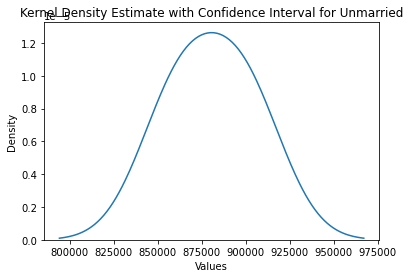

In [73]:
# Calculate the confidence interval for Unmarried and presenting it on the graph
Unmarried_confidence_interval = (Unmarried_sample_mean - margin_of_error, Unmarried_sample_mean + margin_of_error)
print("Confidence Interval 72% Unmarried:", Unmarried_confidence_interval)
sns.kdeplot(Unmarried_confidence_interval)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate with Confidence Interval for Unmarried')
plt.show()

Confidence Interval 72% Married: (825078.0621880881, 861975.537811912)


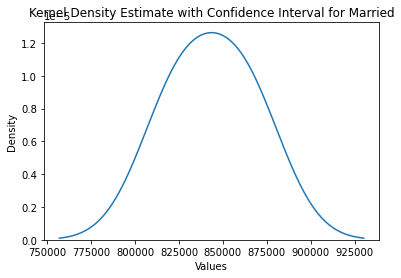

In [74]:
# Calculate the confidence interval for female and presenting it on the graph
Married_confidence_interval = (Married_sample_mean - margin_of_error, Married_sample_mean + margin_of_error)
print("Confidence Interval 72% Married:", Married_confidence_interval)
sns.kdeplot(Married_confidence_interval)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate with Confidence Interval for Married')
plt.show()

# Insight
1) With reference to the above data, at a 95% confidence interval:
   a) The average amount spent by an unmarried customer will lie 
      between 847105.2492916514 and 914046.3107083486.
   b) The average amount spent by a married customer will lie 
      between 810056.2692916514 and 876997.3307083487.
2) Confidence intervals for average unmarried and married spending are overlapping.
3) With respect to the above data, company should target more unmarried customers, 
   as they spend a lot compared to married customers.

# Results when the same activity is performed for Age 

In [38]:
def calculate_age_group_means_and_confidence_intervals(df):
    sum_by_age = df.groupby(['User_ID', 'Age'])['Purchase'].sum().reset_index()
    sum_by_age = sum_by_age.sort_values(by='User_ID', ascending=False)
    # Create dict and filtering data age group wise
    age_groups = {
        'Age_0_17': sum_by_age[sum_by_age['Age'] == '0-17'],
        'Age_18_25': sum_by_age[sum_by_age['Age'] == '18-25'],
        'Age_26_35': sum_by_age[sum_by_age['Age'] == '26-35'],
        'Age_36_45': sum_by_age[sum_by_age['Age'] == '36-45'],
        'Age_46_50': sum_by_age[sum_by_age['Age'] == '46-50'],
        'Age_51_55': sum_by_age[sum_by_age['Age'] == '51-55'],
        'Age_55+': sum_by_age[sum_by_age['Age'] == '55+']
    }
    # Define sample sizes and number of repetitions
    sample_sizes = {
        'Age_0_17': 200,
        'Age_18_25': 1000,
        'Age_26_35': 2000,
        'Age_36_45': 1000,
        'Age_46_50': 500,
        'Age_51_55': 400,
        'Age_55+': 300
    }
    num_repitions = 1000
    # Create a dictionary to store results
    results = {}
    # Perform random sampling and calculate means for each age group
    for age_group, age_df in age_groups.items():
        sample_size = sample_sizes.get(age_group, 0)
        sample_means = []
        for _ in range(num_repitions):
            random_sample = age_df.sample(n=sample_size)
            sample_mean = random_sample['Purchase'].mean()
            sample_means.append(sample_mean)
        # Calculate the population mean, sample mean, and standard deviation
        population_mean = age_df['Purchase'].mean()
        sample_mean_mean = sum(sample_means) / len(sample_means)
        sample_mean_std = pd.Series(sample_means).std()
        # Calculate the confidence interval using the z-distribution
        confidence_level = 0.95  # 95% confidence interval
        z_critical = stats.norm.ppf((1 + confidence_level) / 2)  # Z-score for the desired confidence level
        margin_of_error = z_critical * (age_df['Purchase'].std() / np.sqrt(sample_size))
        lower_bound = sample_mean_mean - margin_of_error
        upper_bound = sample_mean_mean + margin_of_error
        results[age_group] = {
            'Population Mean': population_mean,
            'Sample Mean Mean': sample_mean_mean,
            'Sample Mean Std': sample_mean_std,
            'Confidence Interval': (lower_bound, upper_bound)
        }
    return results
results = calculate_age_group_means_and_confidence_intervals(df)
for age_group, metrics in results.items():
    print(f'{age_group} average spent value, random mean value, std value and Confidence Interval:')
    print(f'{age_group} customer average spent amount: {metrics["Population Mean"]}')
    print(f'Random Sample Mean : {metrics["Sample Mean Mean"]}')
    print(f'Sample Mean Std: {metrics["Sample Mean Std"]}')
    print(f'Confidence Interval: {metrics["Confidence Interval"]}')
    print()

Age_0_17 average spent value, random mean value, std value and Confidence Interval:
Age_0_17 customer average spent amount: 618867.8119266055
Random Sample Mean : 618358.7898400004
Sample Mean Std: 14368.343299029826
Confidence Interval: (523139.3531843962, 713578.2264956046)

Age_18_25 average spent value, random mean value, std value and Confidence Interval:
Age_18_25 customer average spent amount: 854863.119738073
Random Sample Mean : 854761.3700300002
Sample Mean Std: 7193.287434740016
Confidence Interval: (799726.2206564605, 909796.51940354)

Age_26_35 average spent value, random mean value, std value and Confidence Interval:
Age_26_35 customer average spent amount: 989659.3170969313
Random Sample Mean : 989527.6692569997
Sample Mean Std: 3750.7499687555382
Confidence Interval: (944316.1929270764, 1034739.1455869231)

Age_36_45 average spent value, random mean value, std value and Confidence Interval:
Age_36_45 customer average spent amount: 879665.7103684661
Random Sample Mean : 

# Insight
1) With reference to the above data, at a 95% confidence interval:
   a) The highest average amount spent by 26- to 35-year-old customers will lie between 944419.9990 and 1034842.9516.
   b) The average amount spent by 36- to 45-year-old customers will lie between 819003.0902 and 940678.8198.
   c) The average amount spent by 18- to 25-year-old customers will lie between 799594.4375 and 909664.7362.
   d) The average amount spent by 46- to 50-year-old customers will lie between 711215.1004 and 874125.3830.
   e) The average amount spent by 51- to 55-year-old customers will lie between 685670.0292 and 840962.3353.
   f) The average amount spent by 55+ age group customers will lie between 470454.5225 and 610200.5797.
   g) The lowest average amount spent by 0 to 17-year-old customers will lie between 524534.4423 and 714973.3156.
2) From the above data, it is clear that the age group 26 to 35 spends more compared to other age categories.
3) Age groups above 55 and below 0 to 17 spend very little compared to others.
4) Confidence intervals for average 26- to 35-year-old and 36- to 45-year-old spending are not overlapping.
5) With respect to the above data, the company should target the age category between 26 and 35, as they spend more money          compared to others.

# Recommendations

1) Men spend more money than women, so the company should focus on retaining male customers and getting more male customers.
2) Product Category: 5, 1, and 8 have the highest purchasing frequency.
   It means the products in these categories are liked more by customers.
   The company can focus on selling more of these products.
3) Product Category: 11, 2, and 6, 3 have almost close competition in purchasing. 
   The company can focus on selling more of these products.
4) Unmarried customers spend more money compared to married customers. So the company should focus on retaining the unmarried customers and getting more unmarried customers.
5) 86% of purchases are done by customers whose ages are between 18 and 45. So the company should focus on the acquisition of customers who are aged 18–45.
6) Customers living in City_Category C spend more money than other customers living in B or A. Selling more products in City Category C will help the company increase sales.